### Importando as bibliotecas para análise dos dados

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import date

### Selecionando os ativos para análise

In [2]:
ativos = ['BBAS3.SA', 'MGLU3.SA', 'ITSA4.SA', 'BBDC4.SA', 'PETR4.SA']

### Definindo a data de início e fim da análise

In [3]:
inicio = '2020-02-27'
fim = date.today()

### Extraindo os preços de fechamento dos ativos

In [4]:
precos = pd.DataFrame()

for i in ativos:
    precos[i] = yf.download(i, start=inicio, end=fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
precos

,BBAS3.SA,MGLU3.SA,ITSA4.SA,BBDC4.SA,PETR4.SA
Date,,,,,
2020-02-27,41.448456,12.254087,11.169137,25.763815,20.562111
2020-02-28,42.416996,12.319930,11.300873,26.245218,20.594624
2020-03-02,42.679504,12.814971,11.602480,26.597673,21.561773
2020-03-03,41.430344,12.888130,11.432825,25.907204,21.171659
2020-03-04,41.475605,12.790586,11.498801,26.191050,21.854357
...,...,...,...,...,...
2021-11-30,31.840000,7.800000,9.646471,19.890949,26.198181
2021-12-01,31.299999,6.880000,9.620000,19.811026,26.349514
2021-12-02,32.160000,6.760000,9.900000,20.820000,28.360001


### Observando o desempenho dos ativos durante o periodo de pandemia

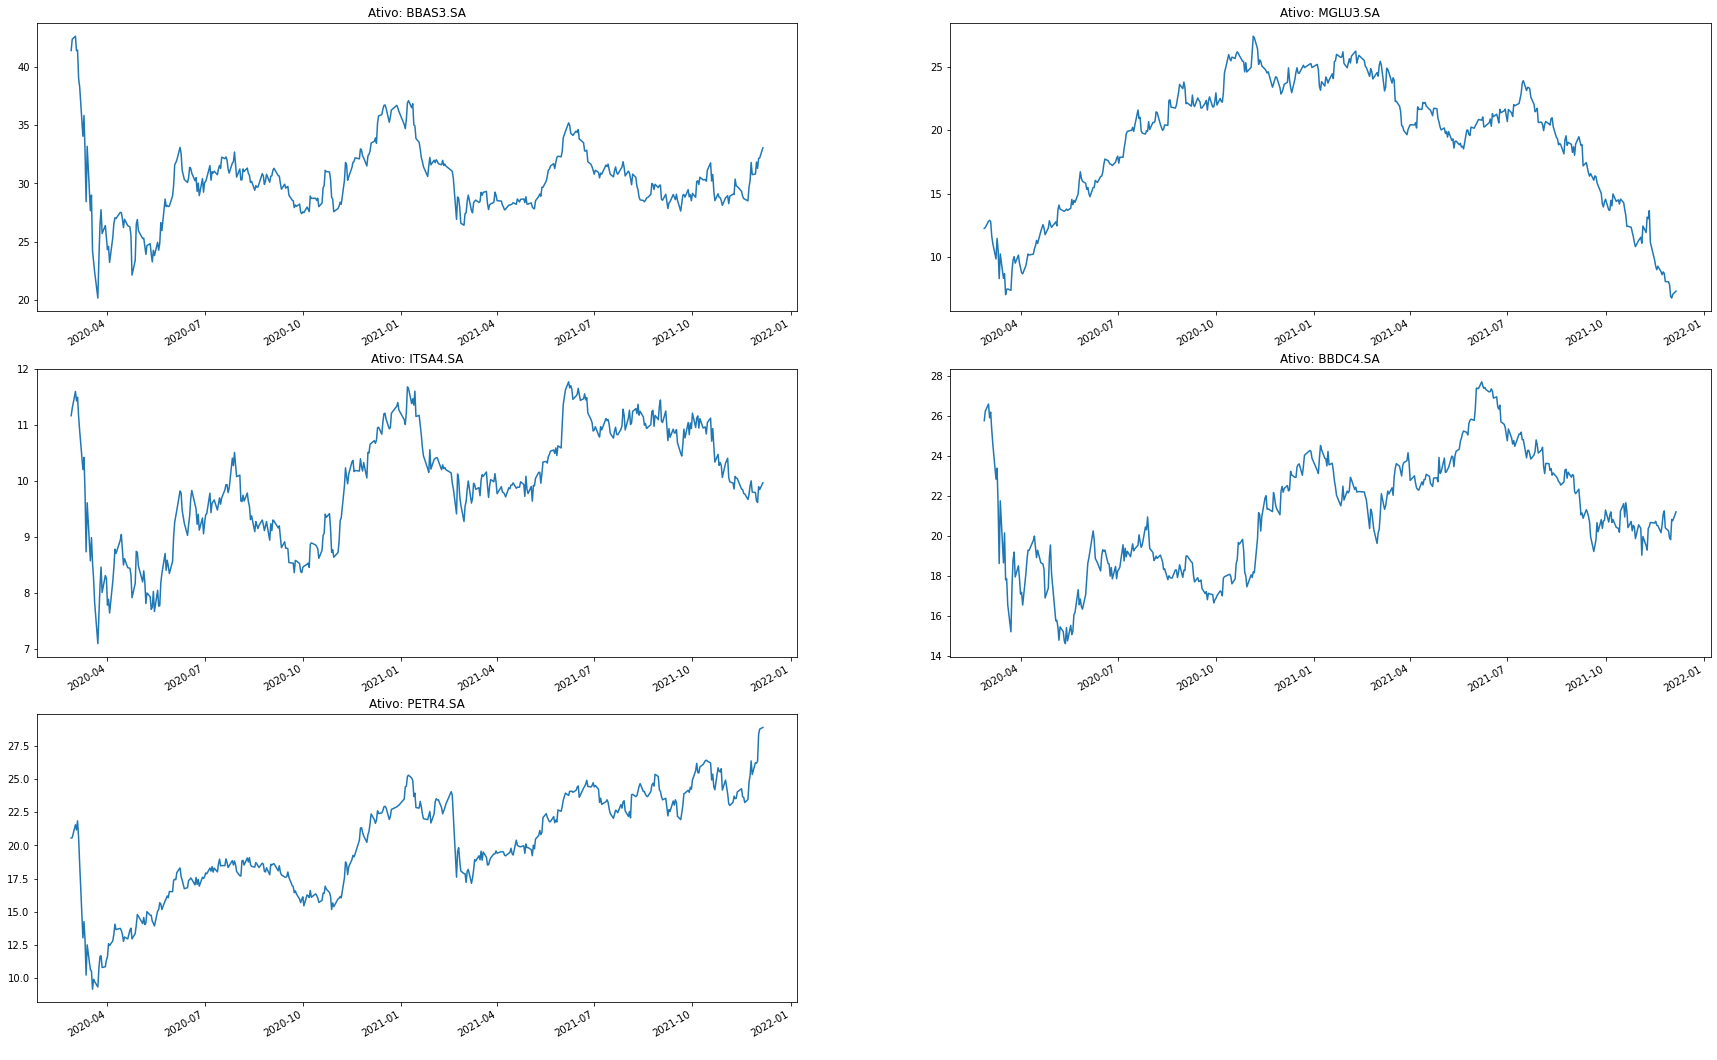

In [6]:
lista_ativos = list(enumerate(ativos))

plt.figure(figsize=(30,20))
for i in lista_ativos:
    plt.subplot(3,2, i[0] + 1)
    precos[i[1]].plot()
    plt.title("Ativo: {}" .format(i[1]))
    plt.xlabel(" ")

## Agora vamos supor que na data de início da pandemia compramos 1.000,00 reais de cada ativo, e vamos compará-los com o índice da Bolsa de Valores de São Paulo (Ibovespa).

In [7]:
#Definindo os valores de cada ativo

compras = {'BBAS3.SA':1000, 
           'MGLU3.SA':1000, 
           'ITSA4.SA':1000, 
           'BBDC4.SA':1000, 
           'PETR4.SA':1000}

In [8]:
compras_df = pd.Series(data = compras, index = list(compras.keys()))

In [9]:
compras_df

BBAS3.SA    1000
MGLU3.SA    1000
ITSA4.SA    1000
BBDC4.SA    1000
PETR4.SA    1000
dtype: int64

### Verificando quantas ações de cada ativo compramos com o valor que alocamos. 

In [10]:
qtd_acoes = compras_df/precos.iloc[0]
qtd_acoes

BBAS3.SA    24.126351
MGLU3.SA    81.605424
ITSA4.SA    89.532432
BBDC4.SA    38.814128
PETR4.SA    48.633139
dtype: float64

In [11]:
preco_liquido = precos*qtd_acoes

In [12]:
preco_liquido

,BBAS3.SA,MGLU3.SA,ITSA4.SA,BBDC4.SA,PETR4.SA
Date,,,,,
2020-02-27,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
2020-02-28,1023.367341,1005.373116,1011.794627,1018.685251,1001.581193
2020-03-02,1029.700710,1045.771138,1038.798247,1032.365490,1048.616721
2020-03-03,999.563019,1051.741327,1023.608636,1005.565509,1029.644260
2020-03-04,1000.655011,1043.781152,1029.515640,1016.582740,1062.845973
...,...,...,...,...,...
2021-11-30,768.183025,636.522322,863.672012,772.049842,1274.099789
2021-12-01,755.154773,561.445325,861.301986,768.947676,1281.459580
2021-12-02,775.903450,551.652684,886.371043,808.110125,1379.235855


In [13]:
preco_liquido['Total'] = preco_liquido.sum(axis=1)

In [14]:
preco_liquido

,BBAS3.SA,MGLU3.SA,ITSA4.SA,BBDC4.SA,PETR4.SA,Total
Date,,,,,,
2020-02-27,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,5000.000000
2020-02-28,1023.367341,1005.373116,1011.794627,1018.685251,1001.581193,5060.801527
2020-03-02,1029.700710,1045.771138,1038.798247,1032.365490,1048.616721,5195.252305
2020-03-03,999.563019,1051.741327,1023.608636,1005.565509,1029.644260,5110.122751
2020-03-04,1000.655011,1043.781152,1029.515640,1016.582740,1062.845973,5153.380517
...,...,...,...,...,...,...
2021-11-30,768.183025,636.522322,863.672012,772.049842,1274.099789,4314.526989
2021-12-01,755.154773,561.445325,861.301986,768.947676,1281.459580,4228.309341
2021-12-02,775.903450,551.652684,886.371043,808.110125,1379.235855,4401.273157


### Extraindo os dados da Bovespa

In [15]:
ibov = yf.download('^BVSP', start=inicio, end=fim)

[*********************100%***********************]  1 of 1 completed


In [16]:
ibov

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-27,105711.0,106656.0,102984.0,102984.0,102984.0,11237700
2020-02-28,102984.0,104172.0,99951.0,104172.0,104172.0,11228400
2020-03-02,104260.0,107220.0,103779.0,106625.0,106625.0,8858400
2020-03-03,106630.0,108804.0,104405.0,105537.0,105537.0,9385600
2020-03-04,105540.0,107809.0,105042.0,107224.0,107224.0,8410500
...,...,...,...,...,...,...
2021-11-30,102814.0,103066.0,100075.0,101915.0,101915.0,18195100
2021-12-01,101916.0,104087.0,100727.0,100775.0,100775.0,13762900
2021-12-02,100785.0,104466.0,100785.0,104466.0,104466.0,14846500


In [17]:
ibov.rename(columns={'Adj Close': 'IBOV'}, inplace=True)

In [18]:
ibov.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], inplace=True)

In [19]:
ibov

,IBOV
Date,
2020-02-27,102984.0
2020-02-28,104172.0
2020-03-02,106625.0
2020-03-03,105537.0
2020-03-04,107224.0
...,...
2021-11-30,101915.0
2021-12-01,100775.0
2021-12-02,104466.0


In [20]:
type(preco_liquido.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [21]:
type(ibov.index)

pandas.core.indexes.datetimes.DatetimeIndex

### Realizando a junção das tabelas dos ativos com a tabela de dados da Bovespa

In [22]:
df = pd.merge(ibov, preco_liquido, how='inner', on = 'Date')

In [23]:
df

,IBOV,BBAS3.SA,MGLU3.SA,ITSA4.SA,BBDC4.SA,PETR4.SA,Total
Date,,,,,,,
2020-02-27,102984.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,5000.000000
2020-02-28,104172.0,1023.367341,1005.373116,1011.794627,1018.685251,1001.581193,5060.801527
2020-03-02,106625.0,1029.700710,1045.771138,1038.798247,1032.365490,1048.616721,5195.252305
2020-03-03,105537.0,999.563019,1051.741327,1023.608636,1005.565509,1029.644260,5110.122751
2020-03-04,107224.0,1000.655011,1043.781152,1029.515640,1016.582740,1062.845973,5153.380517
...,...,...,...,...,...,...,...
2021-11-30,101915.0,768.183025,636.522322,863.672012,772.049842,1274.099789,4314.526989
2021-12-01,100775.0,755.154773,561.445325,861.301986,768.947676,1281.459580,4228.309341
2021-12-02,104466.0,775.903450,551.652684,886.371043,808.110125,1379.235855,4401.273157


### Normalizando os dados

In [24]:
df_final = df/df.iloc[0]

In [25]:
df_final

,IBOV,BBAS3.SA,MGLU3.SA,ITSA4.SA,BBDC4.SA,PETR4.SA,Total
Date,,,,,,,
2020-02-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-02-28,1.011536,1.023367,1.005373,1.011795,1.018685,1.001581,1.012160
2020-03-02,1.035355,1.029701,1.045771,1.038798,1.032365,1.048617,1.039050
2020-03-03,1.024790,0.999563,1.051741,1.023609,1.005566,1.029644,1.022025
2020-03-04,1.041171,1.000655,1.043781,1.029516,1.016583,1.062846,1.030676
...,...,...,...,...,...,...,...
2021-11-30,0.989620,0.768183,0.636522,0.863672,0.772050,1.274100,0.862905
2021-12-01,0.978550,0.755155,0.561445,0.861302,0.768948,1.281460,0.845662
2021-12-02,1.014391,0.775903,0.551653,0.886371,0.808110,1.379236,0.880255


### Comparando o desempenho da nossa carteira de investimento com Bovespa no período de pandemia.

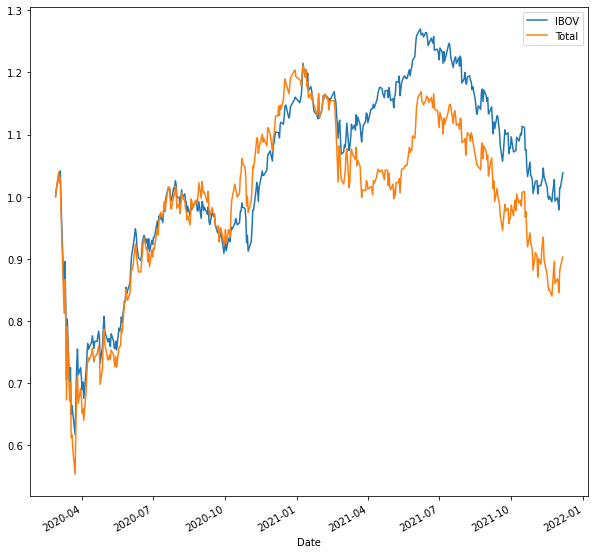

In [26]:
df_final[['IBOV', 'Total']].plot(figsize=(10,10));